In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border:2px  black solid !important;
    padding: 2px  black solid !important;
    margin: 2px  black solid !important;
  color: black !important;
}
</style>

###  <font color='#17A589'> Installing needed packages 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import json
import time
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
# Tweepy keys and token

consumer_key = ''
consumer_secret =''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth) 

### <font color='#17A589'> Data Gathering

In [4]:
# The attached file
url = 'Downloads/data/Data Wrangling Project/twitter-archive-enhanced.csv'
twitter_archive = pd.read_csv(url)

In [5]:
# Download the "image_predictions.tsv" file programmatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# save tsv to file
with open('Downloads/data/Data Wrangling Project/image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [6]:
# read file "image_predictions.tsv"
url = 'Downloads/data/Data Wrangling Project/image-predictions.tsv'
image_predictions = pd.read_csv(url , sep='\t', encoding='utf8')

In [7]:
# collecting data using API  
collected =[]
not_collected =[] # to avoid error/exception messages
with open('Downloads/data/Data Wrangling Project/tweet_json.txt', 'w') as file:
    for tweet_id in list(twitter_archive['tweet_id']):
        try:
            tweet_status = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_status._json, file)
            file.write('\n')
            collected.append(tweet_id)
        except Exception as e:
            not_collected.append(tweet_id)

In [8]:
# new approach for reading the tweet_status To select only columns of interest
df_list = []
with open('Downloads/data/Data Wrangling Project/tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
tweet_status = pd.DataFrame(df_list)

### <font color='#17A589'> Data collection test

In [9]:
twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2057,671355857343524864,NaN,NaN,2015-11-30 15:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lou. He's a Petrarch Sunni Pinto. Well...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671355857...,10,10,Lou,None,None,None,None
328,833722901757046785,NaN,NaN,2017-02-20 17:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bronte. She's fairly h*ckin aerodynami...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833722901...,13,10,Bronte,None,None,None,None
1713,680473011644985345,NaN,NaN,2015-12-25 19:39:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hector. He thinks he's a hammer. Silly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680473011...,10,10,Hector,None,None,pupper,None


In [10]:
image_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
544,677301033169788928,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,1,Japanese_spaniel,0.661178,True,Pekinese,0.150119,True,Chihuahua,0.119720,True
1206,742150209887731712,https://pbs.twimg.com/media/CkylrVWWsAAiXJE.jpg,1,Siamese_cat,0.112413,False,French_bulldog,0.071414,True,hog,0.062465,False
1504,785170936622350336,https://pbs.twimg.com/media/CuV8yfxXEAAUlye.jpg,2,seat_belt,0.891193,False,Eskimo_dog,0.027494,True,Samoyed,0.019530,True


In [11]:
tweet_status.sample(3)

,tweet_id,retweet_count,favorite_count
2037,671138694582165504,373,867
92,874057562936811520,3565,21025
638,791780927877898241,3810,0


### <font color='#17A589'> Data Assessing

### Visual Assassment

In [12]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
tweet_status

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7489,35464
1,892177421306343426,5557,30699
2,891815181378084864,3680,23091
3,891689557279858688,7665,38764
4,891327558926688256,8269,37039
...,...,...,...
2320,666049248165822465,40,96
2321,666044226329800704,125,265
2322,666033412701032449,39,109
2323,666029285002620928,41,119


### Programmatic assessment

In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
twitter_archive.describe()[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [18]:
twitter_archive.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [19]:
twitter_archive.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [20]:
twitter_archive.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [21]:
twitter_archive.query('rating_denominator == 170')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [22]:
twitter_archive.query('rating_denominator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [23]:
twitter_archive.query('rating_numerator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [24]:
len(twitter_archive.query('rating_numerator > 20'))

24

In [25]:
len(twitter_archive.query('rating_denominator > 20'))

13

In [26]:
twitter_archive['name'].value_counts().head(50)

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
Daisy         7
Buddy         7
an            7
Bailey        7
Toby          7
Dave          6
Koda          6
Leo           6
Milo          6
Rusty         6
Jax           6
Bella         6
Jack          6
Stanley       6
Oscar         6
Scout         6
Gus           5
very          5
Phil          5
Alfie         5
Sammy         5
Oakley        5
Finn          5
Bentley       5
Sunny         5
George        5
Louis         5
Larry         5
Chester       5
Reginald      4
Jeffrey       4
quite         4
Cassie        4
Bear          4
Winnie        4
Boomer        4
Maximus       4
Name: name, dtype: int64

In [27]:
image_predictions.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1228,745422732645535745,https://pbs.twimg.com/media/ClhGBCAWIAAFCsz.jpg,1,Labrador_retriever,0.663800,True,golden_retriever,0.308261,True,ice_bear,0.004269,False
1265,749317047558017024,https://pbs.twimg.com/ext_tw_video_thumb/74931...,1,wire-haired_fox_terrier,0.155144,True,Lakeland_terrier,0.108382,True,buckeye,0.074617,False
732,686730991906516992,https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg,1,Tibetan_mastiff,0.338812,True,Newfoundland,0.180925,True,golden_retriever,0.180023,True
987,707741517457260545,https://pbs.twimg.com/media/CdJnJ1dUEAARNcf.jpg,1,whippet,0.738371,True,Italian_greyhound,0.191789,True,American_Staffordshire_terrier,0.020126,True
72,667211855547486208,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True
1221,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [28]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [31]:
image_predictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [32]:
image_predictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [33]:
image_predictions['p1'].value_counts().head(50)

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Staffordshire_bullterrier          20
Siberian_husky                     20
German_shepherd                    20
web_site                           19
Cardigan                           19
Shetland_sheepdog                  18
Eskimo_dog                         18
Maltese_dog                        18
beagle                             18
teddy                              18
Shih-Tzu                           17
Lakeland_ter

In [34]:
rare_things= image_predictions.groupby('p1').filter(lambda x: len(x) < 3)
rare_things.sample(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1831,836380477523124226,https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg,1,wooden_spoon,0.082489,False,sliding_door,0.061017,False,grand_piano,0.055086,False
1351,759846353224826880,https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg,1,Sussex_spaniel,0.355395,True,vizsla,0.141094,True,otterhound,0.092198,True
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,0.000055,False,acorn,0.000026,False
1948,862831371563274240,https://pbs.twimg.com/media/C_lkieeVwAAm0L4.jpg,2,Australian_terrier,0.207281,True,Irish_terrier,0.156296,True,German_shepherd,0.123536,True
763,688908934925697024,https://pbs.twimg.com/media/CY9_BOYWkAAkuzn.jpg,1,crane,0.158859,False,pier,0.130016,False,bell_cote,0.087741,False
318,671763349865160704,https://pbs.twimg.com/media/CVKVM3NW4AAdi1e.jpg,1,prayer_rug,0.445334,False,doormat,0.275311,False,bib,0.048813,False
733,686749460672679938,https://pbs.twimg.com/media/CYfS75fWAAAllde.jpg,1,cheeseburger,0.643808,False,hotdog,0.201378,False,bagel,0.063880,False
471,675135153782571009,https://pbs.twimg.com/media/CV6P1lnWIAAUQHk.jpg,1,stove,0.587507,False,rotisserie,0.051713,False,microwave,0.020725,False


In [35]:
len(rare_things)

271

In [36]:
sum(rare_things['p1'].duplicated())

48

In [37]:
tweet_status.sample(6)

,tweet_id,retweet_count,favorite_count
440,818259473185828864,2238,10961
1989,672222792075620352,197,746
2013,671533943490011136,541,963
320,832682457690300417,2856,11703
224,847842811428974592,1270,5262
2192,668297328638447616,274,591


In [38]:
tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [39]:
tweet_status.describe()

,tweet_id,retweet_count,favorite_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.420880e+17,2640.229247,7426.323011
std,6.822738e+16,4460.386632,11518.451278
min,6.660209e+17,1.000000,0.000000
25%,6.783890e+17,537.000000,1296.000000
50%,7.185406e+17,1236.000000,3227.000000
75%,7.986825e+17,3063.000000,9085.000000
max,8.924206e+17,75707.000000,152949.000000


In [40]:
tweet_status[tweet_status['retweet_count'].duplicated()]

,tweet_id,retweet_count,favorite_count
74,878281511006478336,1135,7129
75,878057613040115712,6062,38838
91,874296783580663808,3699,24087
96,873213775632977920,1418,6628
121,868552278524837888,1876,9389
...,...,...,...
2317,666055525042405380,216,404
2319,666050758794694657,51,122
2321,666044226329800704,125,265
2322,666033412701032449,39,109


In [41]:
len(tweet_status[tweet_status['retweet_count'].duplicated()])

639

## <font color='#17A589'>Assessment report

### Tidiness issues

* Column headers are values, not variables (doggo - floofer - pupper - puppo )             
* Information about one type of observational unit (tweets) is spread across three different files/dataframes. So these three dataframes should be merged as they are part of the same observational unit

### Quality issues

* Change the names of columns type (p1, p2 and p3) to a more descriptive name
* The P1 confidence interval might not be always convincing. I will set the acceptance threshold at P ≥ 0.5. This might mean neglecting a lot of the data (the median is .585).However, the trade off is higher confidence in the results
* Null values are expressed by None
* You only want original dog ratings that have images (a user can retweet their on tweet)
* There are some dog names in lower case letters. I think they are not dogs
* erroneou datetype ( timestamp column) and tweet_id
* For the column “rating_numirator” there are zero values. delete these two columns
* For the column “rating_numirator” there are extreme values
* Delete the cells with numerator more than 20. This will not affect the data
* For the column “rating_denumirator” there are extreme values
* For the column “rating_denumirator” there is a zero value. delete it
* Drop unneeded columns
* There are some strange values in the p1 columns such as “school_bus, pillow, cartoon” these cells must be checked first then deleted if not needed
* 271 rows (frequency less than 3) could be deleted because they are not that frequent and most probably not dogs
*  erroneou data type (tweet_id)
* Remove duplicate tweets "retweat_count"

 ### <font color='#17A589'>  Data Cleaning

#### twitter_archive

In [42]:
# Define : crate a clean DataFrame form the archive

# code
clean_archive = twitter_archive.copy()
# test
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [43]:
# Define: Filter data based on Tweets that contain images only

# coed
clean_archive = clean_archive[clean_archive.retweeted_status_id.isnull()]
clean_archive = clean_archive[clean_archive.retweeted_status_user_id.isnull()]
clean_archive = clean_archive[clean_archive.retweeted_status_timestamp.isnull()]

In [44]:
# test
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [45]:
# Define: Dropping unneded (missing too much values) columns using drop function.

# code 
list_ = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' , 'expanded_urls']
clean_archive = clean_archive.drop(labels = list_ , axis = 1)

In [46]:
# test
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [48]:
# Define: use loc to add a new column dog_class = doggo, floofer, pupper or poppo. NaN will be used if not any of the previous

# Code
# handle none
clean_archive.doggo.replace('None', '', inplace=True)
clean_archive.floofer.replace('None', '', inplace=True)
clean_archive.pupper.replace('None', '', inplace=True)
clean_archive.puppo.replace('None', '', inplace=True)

# merge into column
clean_archive['dog_class'] = clean_archive.doggo + clean_archive.floofer + clean_archive.pupper + clean_archive.puppo

# handle multiple stages
clean_archive.loc[clean_archive.dog_class == 'doggopupper', 'dog_class'] = 'doggo, pupper'
clean_archive.loc[clean_archive.dog_class == 'doggopuppo', 'dog_class'] = 'doggo, puppo'
clean_archive.loc[clean_archive.dog_class == 'doggofloofer', 'dog_class'] = 'doggo, floofer'

# handle missing values
clean_archive.loc[clean_archive.dog_class == '', 'dog_class'] = np.nan

In [49]:
# test
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
 11  dog_class           344 non-null    object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


In [50]:
# dropping unneded doggo, floofer, pupper or poppo columns
_dog = ['doggo', 'floofer', 'pupper' , 'puppo']
clean_archive = clean_archive.drop(labels=_dog , axis=1)

In [52]:
# test
clean_archive['dog_class'].value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_class, dtype: int64

In [53]:
# Define:There are some dog names in lower case letters. I think they are not dogs loop Replace wrong values in the Name column with a function replac
# code
name_lower = [row for row in clean_archive['name']  if row.islower()==True] 
for x in name_lower:
    clean_archive['name'].replace(x , np.nan , inplace=True)

In [54]:
# test
clean_archive[clean_archive['name']== 'a']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_class


In [55]:
# Define: replace the value 'None' with the NaN (missing value)
# code
clean_archive = clean_archive.replace('None' , np.nan)

In [56]:
# test
clean_archive.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_class
1257,710296729921429505,2016-03-17 02:48:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oshie. 12/10 please enjoy (vid by @cat...,12,10,Oshie,NaN
1587,686749460672679938,2016-01-12 03:20:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Strange pup here. Easily manipulated. Rather i...,8,10,NaN,NaN
347,831911600680497154,2017-02-15 17:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Kuyu. He was trapped in a well for 10 day...,14,10,Kuyu,NaN
1421,698195409219559425,2016-02-12 17:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,9,10,Beau,NaN
858,763837565564780549,2016-08-11 20:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's touching a butt. Couldn't ...,11,10,Alfie,NaN


In [57]:
# Define:  Change the data type for the timestamp and tweet_id column 
# code
clean_archive['timestamp'] = pd.to_datetime(clean_archive['timestamp'])
clean_archive['tweet_id'] = clean_archive['tweet_id'].astype(str)

In [58]:
# test
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                1391 non-null   object             
 7   dog_class           344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 152.9+ KB


In [59]:
# Define :Delete zero values in rating_numerator and rating_denominator 
# code
clean_archive.drop(clean_archive.query('rating_numerator == 0').index, inplace = True)
clean_archive.drop(clean_archive.query('rating_denominator == 0').index, inplace = True)

In [60]:
# test
clean_archive[clean_archive['rating_numerator']==0]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_class


In [61]:
# Define :Delete outliers in rating_numerator and rating_denominator 
# code
clean_archive.drop(clean_archive.query('rating_numerator > 20').index, inplace = True)
clean_archive.drop(clean_archive.query('rating_denominator > 20').index, inplace = True)

In [62]:
# test
clean_archive.describe()

,rating_numerator,rating_denominator
count,2150.000000,2150.000000
mean,10.623256,10.011628
std,2.202925,0.389908
min,1.000000,2.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,20.000000,20.000000


#### image_predictions

In [63]:
# Define : crate a clean DataFrame form the image_proedictions
# code
clean_image = image_predictions.copy()
# test
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [64]:
# Define: rename columns 

# Code
dict_ = {'p1':'prediction_1', 
         'p1_conf':'confidence_1',
         'p1_dog':'breed_1'
        }
clean_image = clean_image.rename(columns= dict_)

In [65]:
# test
list(clean_image.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'prediction_1',
 'confidence_1',
 'breed_1',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [66]:
# Define: Exclude all rows with P1_confidence less than 0.5

# Code: 
clean_image = clean_image.query('confidence_1 > 0.5')

In [67]:
# test
assert [clean_image.query('confidence_1 > 0.5')]

In [68]:
# Define: use filter to select only needed columns

# Code
clean_image =clean_image[['tweet_id','jpg_url','prediction_1','confidence_1']]

In [69]:
# test
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 1 to 2072
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      1239 non-null   int64  
 1   jpg_url       1239 non-null   object 
 2   prediction_1  1239 non-null   object 
 3   confidence_1  1239 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.4+ KB


In [70]:
# Define: use groupby to select not rare things in the data (frequency more than 3)

# Code
clean_image = clean_image.groupby('prediction_1').filter(lambda x: len(x) > 3)

In [71]:
# test
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 2 to 2072
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      987 non-null    int64  
 1   jpg_url       987 non-null    object 
 2   prediction_1  987 non-null    object 
 3   confidence_1  987 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 38.6+ KB


In [72]:
# Define:  Change the data type for the tweet_id column 
# code
clean_image['tweet_id'] = clean_image['tweet_id'].astype(str)

In [73]:
# test
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 2 to 2072
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      987 non-null    object 
 1   jpg_url       987 non-null    object 
 2   prediction_1  987 non-null    object 
 3   confidence_1  987 non-null    float64
dtypes: float64(1), object(3)
memory usage: 38.6+ KB


#### tweet_status

In [74]:
# Define : create a clean dataframe from the twett_status

# code 
clean_status = tweet_status.copy()

# test
clean_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [75]:
# Define:  Change the data type for the tweet_id column 
# code
clean_status['tweet_id'] = clean_status['tweet_id'].astype(str)

In [76]:
# test
clean_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2325 non-null   object
 1   retweet_count   2325 non-null   int64 
 2   favorite_count  2325 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [77]:
# Define : Remove duplicate tweets
# code
clean_status = clean_status.drop_duplicates(['retweet_count'])

In [78]:
# test
assert[clean_image.duplicated()==False]

### <font color='#17A589'> Merging documents to form a working dataframe

In [79]:
# Merge the archive and prediction tables into a single data frame
combined_archive = pd.merge(clean_archive , clean_image, on='tweet_id')
# Merge the tweet_json table into the combined_archive data frame
combined_archive= pd.merge(combined_archive, clean_status, on='tweet_id')

In [80]:
# Verify the structure of the new combined_archive dataframe
combined_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 0 to 653
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            654 non-null    object             
 1   timestamp           654 non-null    datetime64[ns, UTC]
 2   source              654 non-null    object             
 3   text                654 non-null    object             
 4   rating_numerator    654 non-null    int64              
 5   rating_denominator  654 non-null    int64              
 6   name                479 non-null    object             
 7   dog_class           115 non-null    object             
 8   jpg_url             654 non-null    object             
 9   prediction_1        654 non-null    object             
 10  confidence_1        654 non-null    float64            
 11  retweet_count       654 non-null    int64              
 12  favorite_count      654 non-null    

In [81]:
# Visually assess the combined_archive dataframe 
combined_archive

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_class,jpg_url,prediction_1,confidence_1,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,3680,23091
1,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,8269,37039
2,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,16776,59791
3,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,6509,29336
4,890006608113172480,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,13,10,Koda,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,0.957979,6516,28253
...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,667044094246576128,2015-11-18 18:17:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12/10 gimme now https://t.co/QZAnwgnOMB,12,10,NaN,NaN,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,golden_retriever,0.765266,44,174
650,666345417576210432,2015-11-16 20:01:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,10,10,NaN,NaN,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,golden_retriever,0.858744,128,269
651,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,1,2,NaN,NaN,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,Maltese_dog,0.857531,57,132
652,666063827256086533,2015-11-16 01:22:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,10,10,NaN,NaN,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,0.775930,192,438


###  <font color='#17A589'> Storing, Analyzing, and Visualizing Data

* Store the combined_archive DataFrame in a CSV file

In [82]:
combined_archive.to_csv('Downloads/data/Data Wrangling Project/twitter_archive_master.csv', index=False, encoding = 'utf-8')                  

* What the most common dog name is ?

In [83]:
# Find the total occurrences of each dog name in the cleaned combined_archive dataframe
combined_archive.name.value_counts().head(50)

Oliver       6
Penny        6
Cooper       5
Lucy         5
Daisy        4
Tucker       3
Jeffrey      3
Sadie        3
Stanley      3
Koda         3
Lola         3
Brody        3
Chester      3
Jax          3
Oscar        3
Maggie       3
Winnie       3
Sebastian    3
Winston      2
Scooter      2
George       2
Max          2
Gus          2
Cassie       2
Gizmo        2
Finn         2
Remington    2
Archie       2
Wyatt        2
Chuckles     2
Vincent      2
Bubbles      2
Phil         2
Kyle         2
Malcolm      2
Ted          2
Wilson       2
Zeke         2
Kreg         2
Riley        2
Dexter       2
Waffles      2
Leo          2
Benji        2
Watson       2
Louis        2
Boomer       2
Axel         2
Wallace      2
Belle        2
Name: name, dtype: int64

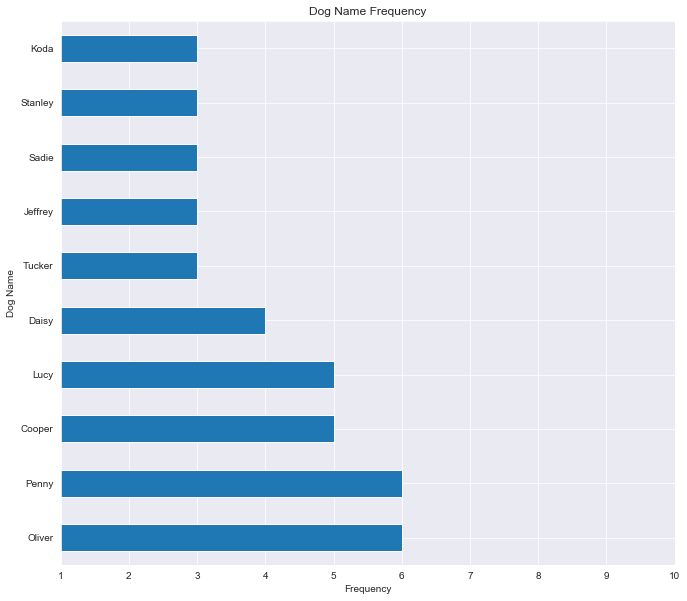

In [84]:
# Plot the top 10 Dog names by frequency
plt.figure(figsize=(11, 10))
dog_names = combined_archive.name.value_counts().nlargest(10).plot(kind = 'barh');
dog_names.set_title('Dog Name Frequency');
dog_names.set_xlabel('Frequency');
dog_names.set_ylabel('Dog Name');
dog_names.set_xlim(1, 10);

* What the most common dog kind is?

In [85]:
combined_archive['dog_class'].value_counts()

pupper           66
doggo            27
puppo            14
doggo, pupper     5
floofer           3
Name: dog_class, dtype: int64

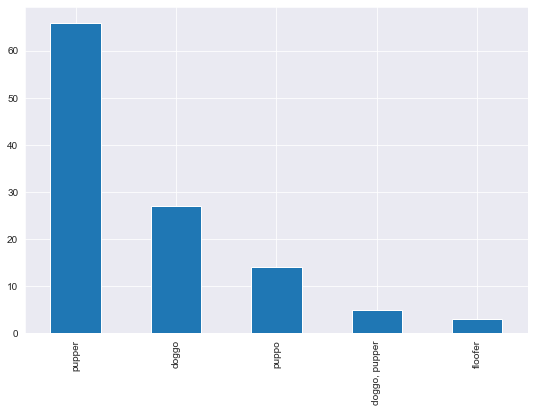

In [91]:
combined_archive['dog_class'].value_counts().plot(kind='bar' , figsize=(9,6));

* Is there a specific breed that received more favorite than the others?

In [87]:
df_1 = combined_archive[['prediction_1', 'favorite_count']] 
df_1.sort_values('favorite_count', ascending = False).groupby(['prediction_1'], sort = False).describe().head()

favorite_count                                       \
                            count          mean           std      min   
prediction_1                                                             
Labrador_retriever           45.0  13337.222222  23317.684305    294.0   
Chihuahua                    32.0  11509.781250  21222.137860    220.0   
French_bulldog               13.0  19490.615385  30476.441581    896.0   
Eskimo_dog                    3.0  47913.333333  56438.561289  15021.0   
swing                         3.0  31865.666667  39584.006181   7253.0   

                                                          
                        25%      50%       75%       max  
prediction_1                                              
Labrador_retriever   2371.0   6215.0  15245.00  152949.0  
Chihuahua            1835.0   3956.5  12650.75  118098.0  
French_bulldog       2916.0   9925.0  20043.00  114244.0  
Eskimo_dog          15329.0  15637.0  64359.50  113082.0  
swing                9035.0  10817.0  44172.00   77527.0

In [88]:
df_1 = combined_archive[['prediction_1', 'favorite_count']] 
df_2= df_1.sort_values('favorite_count', ascending = False).groupby(['prediction_1'], sort = False).describe()
df_2.sort_values(('favorite_count', 'mean'), ascending = False).head()

favorite_count                                                \
                        count          mean           std      min      25%   
prediction_1                                                                  
Eskimo_dog                3.0  47913.333333  56438.561289  15021.0  15329.0   
brown_bear                1.0  31994.000000           NaN  31994.0  31994.0   
swing                     3.0  31865.666667  39584.006181   7253.0   9035.0   
hippopotamus              3.0  21338.000000  13341.430171  10036.0  13979.5   
French_bulldog           13.0  19490.615385  30476.441581    896.0   2916.0   

                                            
                    50%      75%       max  
prediction_1                                
Eskimo_dog      15637.0  64359.5  113082.0  
brown_bear      31994.0  31994.0   31994.0  
swing           10817.0  44172.0   77527.0  
hippopotamus    17923.0  26989.0   36055.0  
French_bulldog   9925.0  20043.0  114244.0

* A dog from the Labrador_retriever breed received the maximum number of favourites (152949). 
* On average, Eskimo_dog received higher favourites (average = 47913) than the others. 
* In the second place for favourites comes the swing (average = 31865).